<a href="https://colab.research.google.com/github/PsorTheDoctor/Sekcja-SI/blob/master/modern_approach/text_to_image/stable_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stable Diffusion

In [1]:
 !pip install -q --upgrade diffusers transformers scipy
 !huggingface-cli login

     |████████████████████████████████| 153 kB 26.6 MB/s 
     |████████████████████████████████| 4.9 MB 47.6 MB/s 
     |████████████████████████████████| 120 kB 60.1 MB/s 
     |████████████████████████████████| 6.6 MB 60.1 MB/s 

        _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
        _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
        _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
        _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
        _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

        To login, `huggingface_hub` now requires a token generated from https://huggingface.co/settings/tokens .
        
Token: 
Login successful
Your token has been saved to

{'trained_betas'} was not found in config. Values will be initialized to default values.
ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


  0%|          | 0/51 [00:00<?, ?it/s]

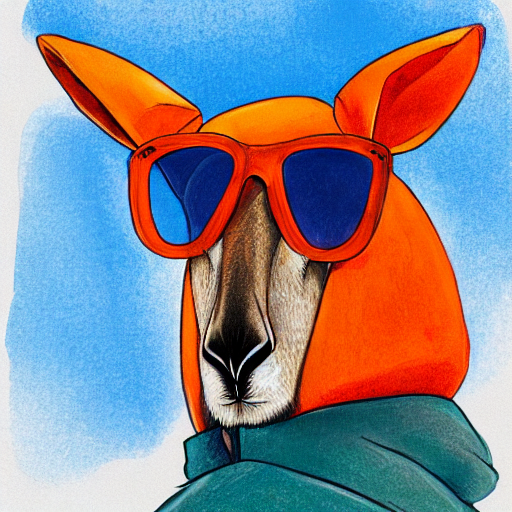

In [5]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline

model = 'CompVis/stable-diffusion-v1-4'
device = 'cuda'

pipe = StableDiffusionPipeline.from_pretrained(model, use_auth_token=True)
pipe = pipe.to(device)

prompt = 'kangaroo wearing an orange hoodie and blue sunglasses in photorealistic style'
with autocast(device):
  img = pipe(prompt, guidance_scale=7.5)['sample'][0]

img.save('result.png')
img

##Multiple images from a single prompt

In [6]:
nImages = 3
lst = []

for _ in range(nImages):
  with autocast(device):
    lst.append(pipe(prompt, guidance_scale=7.5)['sample'][0])

for i in range(nImages):
  lst[i].save(f'result{i}.png')

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]